## 베이즈 정리
- A : 가설, 주로 H를 씀 | B : 데이터, 주로 D를 씀 
- 객관적인 확률이 존재하는 것이 아니라 확률은 계속 업데이트가 된다는 전제

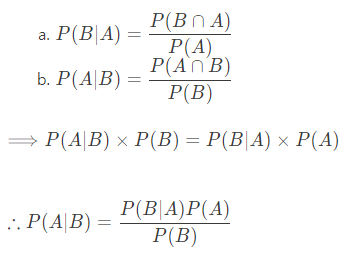


- P(H|D) : 사후확률, 데이터가 존재할 때 가설이 맞는지에 대한 확률
- P(D|H) : 가능도, 어떤 사건이 발생했을 때 다음 사건이 발생할 수 있는 모든 확률의 발생가능한 정도 --> 가설이 주어졌을 때 데이터가 존재할 확률
---
### 사후확률 
: 사전확률 P(H) 에 가능도를 곱하여 데이터의 확률로 나눈 것
- 기존의 데이터로 나중을 예측

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

viagra_spam = {'viagra':[1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1],
               'spam':[1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1]}
df = pd.DataFrame(viagra_spam, columns = ['viagra','spam'])
np_data = df.values

In [2]:
df

,viagra,spam
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,0
8,1,1
9,1,0


In [3]:
np_data

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1]])

In [4]:
sum((np_data[:,0] == 1) & (np_data[:,1] == 1))/ 20

0.15

In [5]:
p_viagra = sum(np_data[:,0] == 1) / len(np_data)
p_viagra

0.3

In [6]:
p_spam = sum(np_data[:, 0] == 1) / len(np_data)
p_spam

0.3

In [7]:
p_v_cap_s = sum((np_data[:,0] == 1) & (np_data[:,1] == 1)) / len(np_data) # viagra와 spam의 교집합

In [8]:
p_n_v_cap_s = sum((np_data[:,0] == 0) & (np_data[:,1] == 1)) / len(np_data) # not viagra와 spam의 교집합
p_n_v_cap_s

0.15

In [9]:
p_spam * (p_v_cap_s / p_spam) / p_viagra # p(spam|viagra)

0.5

In [10]:
p_spam * (p_n_v_cap_s / p_spam) / (1-p_viagra) # p(spam|~viagra)

0.2142857142857143

viagra가 있을 때 spam으로 분류하는 비율이 viagra가 없을 때 spam으로 분류하는 비율보다 높으므로 합리적인 분류

## 나이브 베이지안 분류기
- 여러 개의 열을 사용하여 분류기를 구성

In [11]:
data_url = '/content/drive/MyDrive/source/ch11/fraud.csv'
df = pd.read_csv(data_url, sep=',')
df.head()

,ID,History,CoApplicant,Accommodation,Fraud
0,1,current,none,own,True
1,2,paid,none,own,False
2,3,paid,none,own,False
3,4,paid,guarantor,rent,True
4,5,arrears,none,own,False


In [12]:
del df['ID']
Y_data = df.pop('Fraud')
Y_data = Y_data.values
x_df = pd.get_dummies(df) # 원핫인코딩
x_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
History_arrears,0,0,0,0,1,1,0,1,0,0
History_current,1,0,0,0,0,0,1,0,1,0
History_none,0,0,0,0,0,0,0,0,0,1
History_paid,0,1,1,1,0,0,0,0,0,0
CoApplicant_coapplicant,0,0,0,0,0,0,0,0,0,0
CoApplicant_guarantor,0,0,0,1,0,0,0,0,0,0
CoApplicant_none,1,1,1,0,1,1,1,1,1,1
Accommodation_free,0,0,0,0,0,0,0,0,0,0
Accommodation_own,1,1,1,0,1,1,1,1,0,1
Accommodation_rent,0,0,0,1,0,0,0,0,1,0


In [13]:
Y_data

array([ True, False, False,  True, False,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False])

In [14]:
x_data = x_df.values
x_data

array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0]], dtype=uint8)

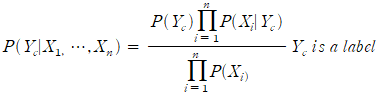

log로 식을 정리해주면 

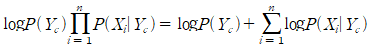

In [15]:
P_Y_True = sum(Y_data==True) / len(Y_data)
P_Y_False = 1 - P_Y_True

P_Y_True, P_Y_False

(0.3, 0.7)

In [16]:
np.where(Y_data) # True 위치

(array([ 0,  3,  5,  9, 11, 12]),)

In [17]:
ix_Y_True = np.where(Y_data) # P(Y true)
ix_Y_False = np.where(Y_data==False) # P(Y false)

ix_Y_True, ix_Y_False

((array([ 0,  3,  5,  9, 11, 12]),),
 (array([ 1,  2,  4,  6,  7,  8, 10, 13, 14, 15, 16, 17, 18, 19]),))

In [18]:
p_x_y_true = (x_data[ix_Y_True].sum(axis=0)) / sum(Y_data==True)
p_x_y_false = (x_data[ix_Y_False].sum(axis=0)) / sum(Y_data==False)

p_x_y_true, p_x_y_false

(array([0.16666667, 0.5       , 0.16666667, 0.16666667, 0.        ,
        0.16666667, 0.83333333, 0.        , 0.66666667, 0.33333333]),
 array([0.42857143, 0.28571429, 0.        , 0.28571429, 0.14285714,
        0.        , 0.85714286, 0.07142857, 0.78571429, 0.14285714]))

In [19]:
x_test = [0,1,0,0,0,1,0,0,1,0]

p_y_true_test = P_Y_True + p_x_y_true.dot(x_test)
p_y_false_test = P_Y_False + p_x_y_false.dot(x_test)

p_y_true_test, p_y_false_test

(1.6333333333333333, 1.7714285714285714)

In [20]:
p_y_true_test < p_y_false_test # true : 사기 데이터가 아닐 확률이 높다

True

## 나이브 베이지안 분류기 Naive Bayes
- Gaussian 표본을 아주 많이 뽑으면
- Multinomial 베르누이를 여러번
- Bernoulli 0,1 불린형 피쳐

#### BoW(Bag of Words)
- 단어별로 인덱스가 부여되어 있을 때 한 문장 또는 한 문서에 대한 벡터를 표현하는 기법
- 한 단어를 벡터화 시킬 때는 원핫인코딩 기법 사용
- 출현한 단어에 대해서만 단어의 개수를 벡터로 표현

In [21]:
y_example_text = ['Sports','Not Sports','Sports','Sports','Not Sports']
y_example = [1 if c=='Sports' else 0 for c in y_example_text]
text_example = ['A great game game','The The election was over',
                'Very clean game match',
                'A clean but forgettable game game',
                'It was a close election']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

countvect_example = CountVectorizer()
X_example = countvect_example.fit_transform(text_example)
countvect_example.get_feature_names() # 함수의 결과로 처리된 단어들의 모임

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['but',
 'clean',
 'close',
 'election',
 'forgettable',
 'game',
 'great',
 'it',
 'match',
 'over',
 'the',
 'very',
 'was']

In [23]:
countvect_example.transform(text_example).toarray()

array([[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [24]:
countvect_example.vocabulary_ # 각 단어의 인덱스 번호 출력

{'but': 0,
 'clean': 1,
 'close': 2,
 'election': 3,
 'forgettable': 4,
 'game': 5,
 'great': 6,
 'it': 7,
 'match': 8,
 'over': 9,
 'the': 10,
 'very': 11,
 'was': 12}

### 베르누이 나이브 베이지안 분류기

- 모든 데이터가 불린 피쳐
- 이산형 데이터를 모두 불린으로 변경하여 학습
- 예를 들어 정수형이 들어가면 이를 임계값 기준으로 T/F 변환 후 학습

In [25]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=1, binarize=0)
# alpha : 스무딩 매개변수, 이 값이 클수록 피쳐 간의 차이가 줄어듦.
# binarize : 임계값

clf.fit(X_example, y_example)

BernoulliNB(alpha=1, binarize=0)

In [26]:
clf.class_log_prior_

array([-0.91629073, -0.51082562])

### 다항 나이브 베이지안 분류기
- 각 피쳐들은 이산형이지만, 여러 개의 값을 가질 수 있음
- alpha 값만 정의하면 바로 사용 

In [33]:
from sklearn.naive_bayes import MultinomialNB

text_example = ['Chinese Beijing Chinese','Chinese Chinese Shanghai','Chinese Mexico','Tokyo Japan Chinese']
y_example = np.array([1,1,1,0])
X_example = countvect_example.fit_transform(text_example)
print('feature name:',countvect_example.get_feature_names_out())

feature name: ['beijing' 'chinese' 'japan' 'mexico' 'shanghai' 'tokyo']


In [34]:
clf = MultinomialNB(alpha=1)
clf.fit(X_example, y_example)

MultinomialNB(alpha=1)

In [35]:
X_test_dtm=countvect_example.transform(['Chinese Chinese Chinese Tokyo Japan'])
print(X_test_dtm.toarray()) #feature name 개수

[[0 3 1 0 0 1]]


In [38]:
clf.predict(X_test_dtm)

array([1])

### 가우시안 나이브 베이지안 분류기
- 이산형 데이터가 아닌 경우에 나이브 베이지안 적용
- y의 분포를 정규분포로 가정

In [46]:
from sklearn.naive_bayes import GaussianNB

data = pd.DataFrame()

# Create out feature variables
data['Height'] = [6,5.92,5.58,5.92,5.5,5.5,5.42,5.75] # ft 단위
data['Weight'] = [180,190,170,165,100,150,130,150] # lbs 단위
data['Foot_Size'] = [12,11,12,10,6,8,7,9] # inch 단위

X = data
Y = [0,0,0,0,1,1,1,1] # 0 : 남자, 1: 여자

clf = GaussianNB()
clf.fit(X_example.toarray(), y_example)

GaussianNB()

In [48]:
data_test = pd.DataFrame()
data_test['Height'] = [5.855, 5.4175] # [남자 평균, 여자 평균]
data_test['Weight'] = [176.25, 132.5] 
data_test['Foot_Size'] = [11.25, 7.5]

## gnb.predict(data_test) # --> array([0, 1]) 